## Understanding Problem Statement
Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. I will be usign a step-by-step systematic approach using a method that could be used for a variety of ML problems.
What is the likelihood of an active employee leaving the company?
What are the key indicators of an employee leaving the company?
What policies or strategies can be adopted based on the results to improve employee retention?
Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company. 

## Importing Libraries

In [1]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [2]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()

In [3]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification
# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [4]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

In [5]:
# Read Excel file
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_936b5453486a485a92df909519beeb4e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kTcx3T-d0AkXnb204E98MV_6CWpYFBJkg41-aM7loOQn',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_936b5453486a485a92df909519beeb4e.get_object(Bucket='digitalsummit-donotdelete-pr-aachs40fmouamm',Key='WA_Fn-UseC_-HR-Employee-Attrition.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Description and Exploratory Visualisations

In [6]:
# Dataset columns
df_data_0.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df_data_0.columns.to_series().groupby(df_data_0.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [8]:
# Columns datatypes and missign values
df_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

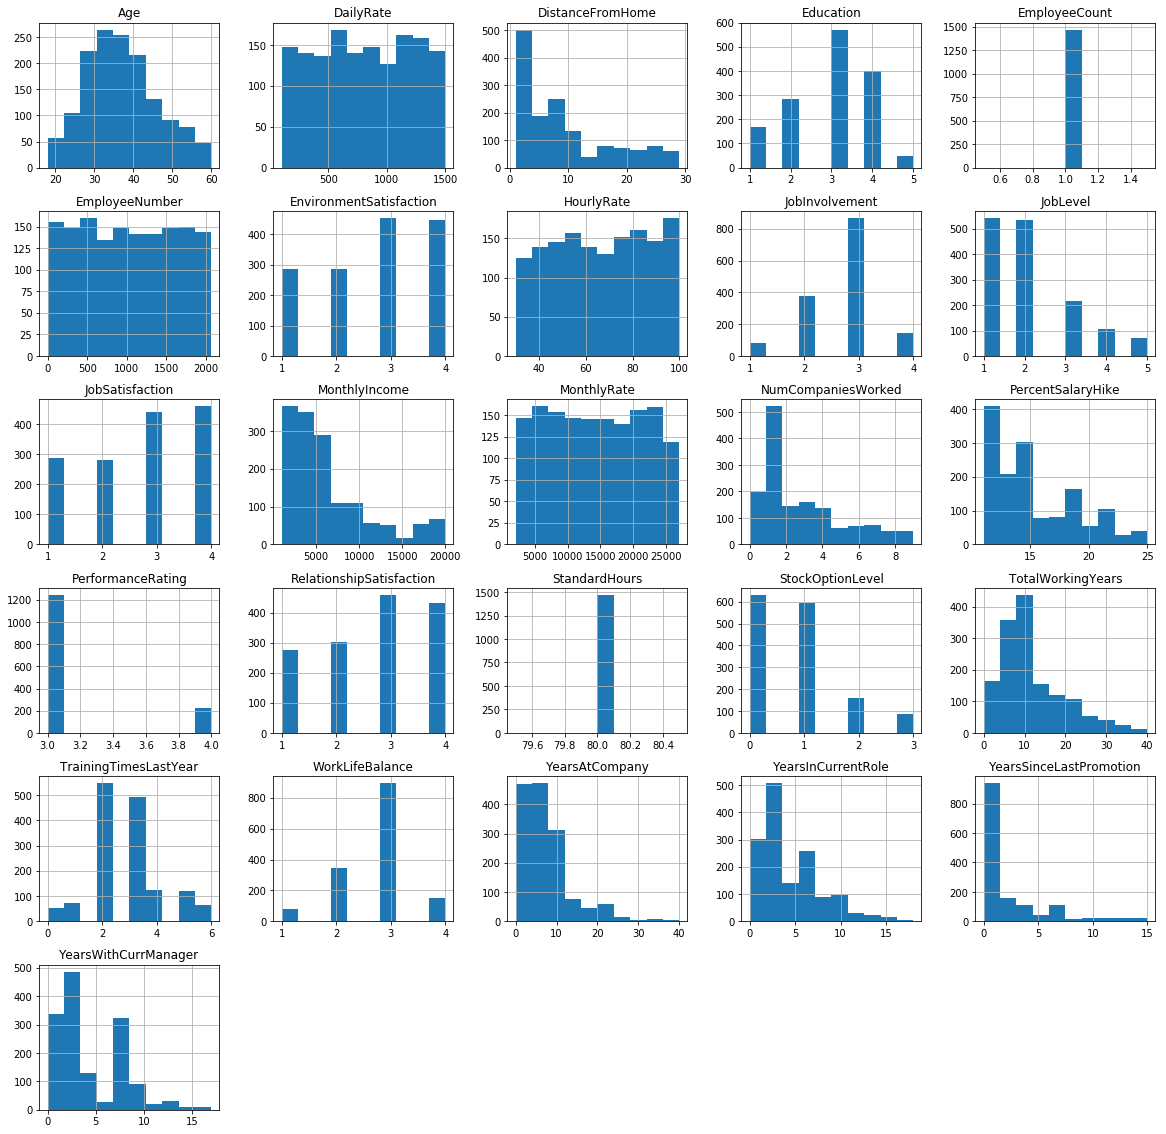

In [10]:
df_data_0.hist(figsize=(20,20))
plt.show()

## Feature distribution by target attribute

In [11]:
# Education Field of employees
df_data_0['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

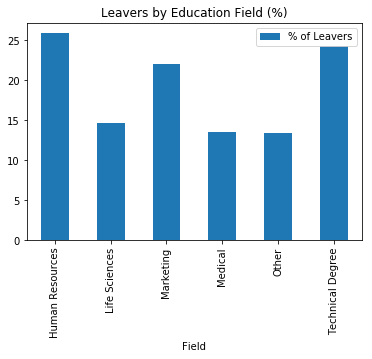

In [12]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df_data_0['EducationField'].unique()):
    ratio = df_data_0[(df_data_0['EducationField']==field)&(df_data_0['Attrition']=="Yes")].shape[0] / df_data_0[df_data_0['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.plot(kind='bar',title='Leavers by Education Field (%)')

In [13]:
# Gender of employees
df_data_0['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [14]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_data_0[(df_data_0['Attrition'] == 'Yes') & (
    df_data_0['Gender'] == 'Male')].shape[0] / df_data_0[df_data_0['Gender'] == 'Male'].shape[0])*100, (df_data_0[(df_data_0['Attrition'] == 'Yes') & (df_data_0['Gender'] == 'Female')].shape[0] / df_data_0[df_data_0['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.


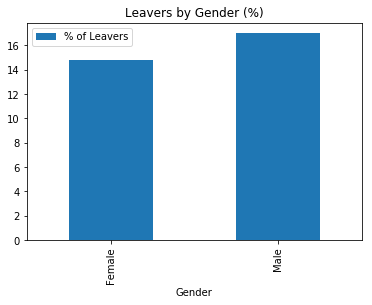

In [15]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for field in list(df_data_0['Gender'].unique()):
    ratio = df_data_0[(df_data_0['Gender']==field)&(df_data_0['Attrition']=="Yes")].shape[0] / df_data_0[df_data_0['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="Gender").sum()
df_G.plot(kind='bar',title='Leavers by Gender (%)')

In [16]:
# Marital Status of employees
df_data_0['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

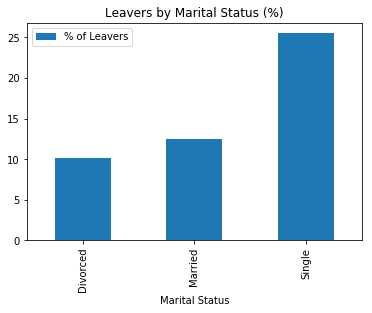

In [17]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
for field in list(df_data_0['MaritalStatus'].unique()):
    ratio = df_data_0[(df_data_0['MaritalStatus']==field)&(df_data_0['Attrition']=="Yes")].shape[0] / df_data_0[df_data_0['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_MF = df_Marital.groupby(by="Marital Status").sum()
df_MF.plot(kind='bar',title='Leavers by Marital Status (%)')

### Correlation

In [22]:
# Find correlations with the target and sort
df_data_0_trans = df_data_0.copy()
df_data_0_trans['Target'] = df_data_0_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_data_0_trans = df_data_0_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_data_0_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


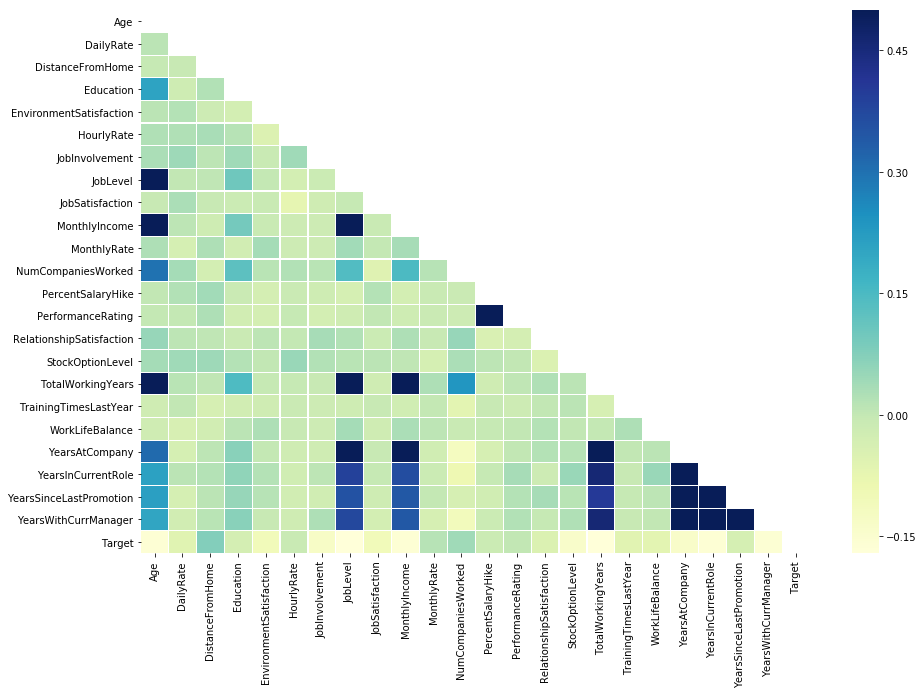

In [23]:
#Heatmap
# Calculate correlations
corr = df_data_0_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

## Pre-processing Pipeline

Encoding
Machine Learning algorithms can typically only have numerical values as their predictor variables. 
Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. 
To avoid introducing feature importance for categorical features with large numbers of unique values, 
we will use both Lable Encoding and One-Hot Encoding as shown below.

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [25]:
print(df_data_0.shape)
df_data_0.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_data_0.columns[1:]:
    if df_data_0[col].dtype == 'object':
        if len(list(df_data_0[col].unique())) <= 2:
            le.fit(df_data_0[col])
            df_data_0[col] = le.transform(df_data_0[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [27]:
# convert rest of categorical variable into dummy
df_data_0 = pd.get_dummies(df_data_0, drop_first=True)
#The resulting dataframe has 49 columns for 1,470 employees.

In [28]:
print(df_data_0.shape)
df_data_0.head()

(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,0,1,0,0,0,0,0,0,1,0


## Feature Scaling
Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. 
Machine Learning algorithms perform better when input numerical variables fall within a similar scale. 
In this case, we are scaling between 0 and 5.

In [29]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_data_0.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_data_0[col] = df_data_0[col].astype(float)
    df_data_0[[col]] = scaler.fit_transform(df_data_0[[col]])
df_data_0['Attrition'] = pd.to_numeric(df_data_0['Attrition'], downcast='float')
df_data_0.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [30]:
print('Size of Full Encoded Dataset: {}'. format(df_data_0.shape))

Size of Full Encoded Dataset: (1470, 49)


## Splitting data into training and testing sets
Prior to implementating or applying any Machine Learning algorithms, we must decouple training and testing datasets from our master dataframe.

In [31]:
#Splitting data into training and testing sets
target = df_data_0['Attrition'].copy()

In [32]:
type(target)

pandas.core.series.Series

In [33]:
# let's remove the target feature and redundant features from the dataset
df_data_0.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df_data_0.shape))

Size of Full dataset is: (1470, 44)


In [34]:
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_data_0,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1102, 44)
Number transactions y_train dataset:  (1102,)
Number transactions X_test dataset:  (368, 44)
Number transactions y_test dataset:  (368,)


## Building Machine Learning Models
### Baseline Algorithms
Let's first use a range of baseline algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. The algorithms considered in this section are: Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB.

In [35]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [36]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,82.03,8.06,74.49,5.53
2,SVM,78.88,8.21,84.48,4.18
1,Random Forest,78.86,7.01,85.30,3.75
5,Gaussian NB,75.06,5.10,68.14,3.14
3,KNN,66.42,9.90,84.21,4.04
4,Decision Tree Classifier,58.02,6.23,76.22,4.23


Classification Accuracy is the number of correct predictions made as a ratio of all predictions made.
It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

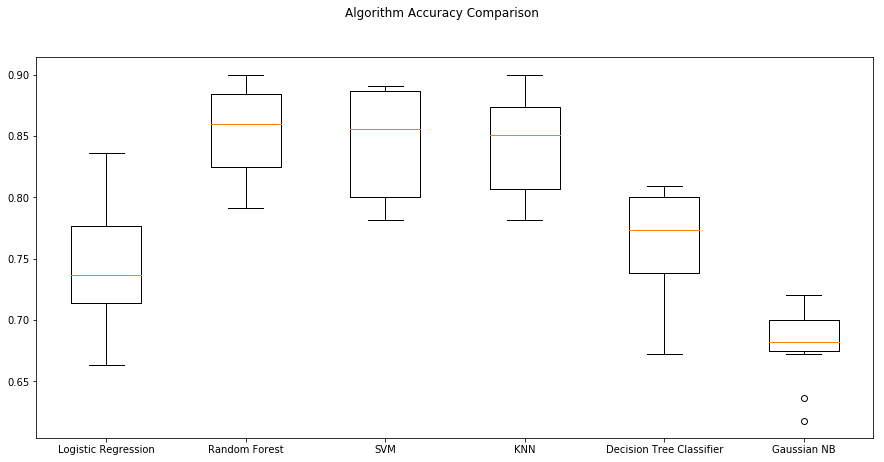

In [37]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

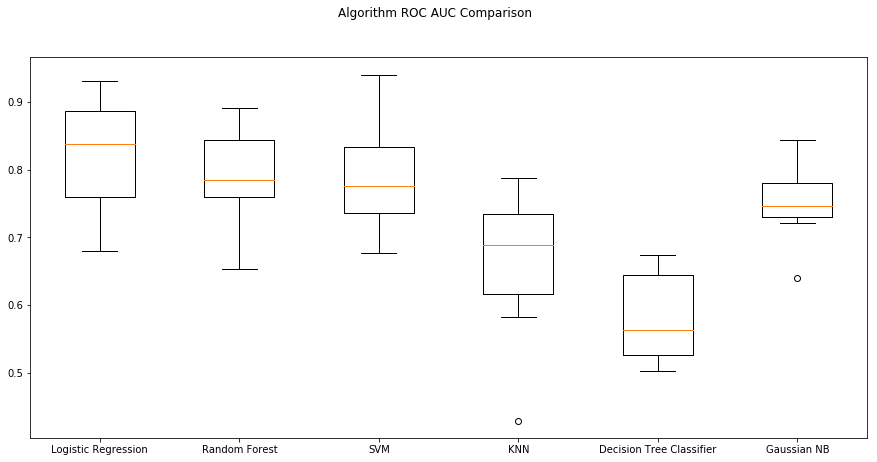

In [38]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Based on our ROC AUC comparison analysis, Logistic Regression and Random Forest show the highest mean AUC scores. We will shortlist these two algorithms for further analysis. See below for more details on these two algos.

## Logistic Regression

In [39]:
#Logistic Regression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.82 (0.08)


### Fine Tuning
GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

In [40]:
#Fine Tuning
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)
#As shown above, the results from GridSearchCV provided us with fine-tuned hyper-parameter using ROC_AUC as the scoring metric.

best params: LogisticRegression(C=0.05099999999999999, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=7,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.05099999999999999}
best score: 0.8180815631000706


Text(0.5, 257.44, 'Predicted label')

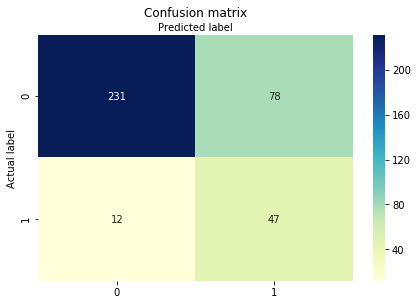

In [41]:
#Evaluation
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 75.54


The Confusion matrix is telling us that we have 231+47 correct predictions and 78+12 incorrect predictions. In other words, an accurac of 75.54%.

In [43]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84       309
         1.0       0.38      0.80      0.51        59

   micro avg       0.76      0.76      0.76       368
   macro avg       0.66      0.77      0.67       368
weighted avg       0.86      0.76      0.78       368



Instead of getting binary estimated target features (0 or 1), a probability can be associated with the predicted target.
The output provides a first index referring to the probability that the data belong to class 0 (employee not leaving), and the second refers to the probability that the data belong to class 1 (employee leaving).
The resulting AUC score is: 0.857 which is higher than that best score during the optimisation step.

In [44]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.857


## Random Forest Classifier

Fine-tuning the Random Forest algorithm's hyper-parameters by cross-validation against the AUC score.

In [45]:
#Fine Tuning
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=None, oob_score=False, random_state=7,
            verbose=0, warm_start=False)
best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 75}
best score: 0.7956083711198764


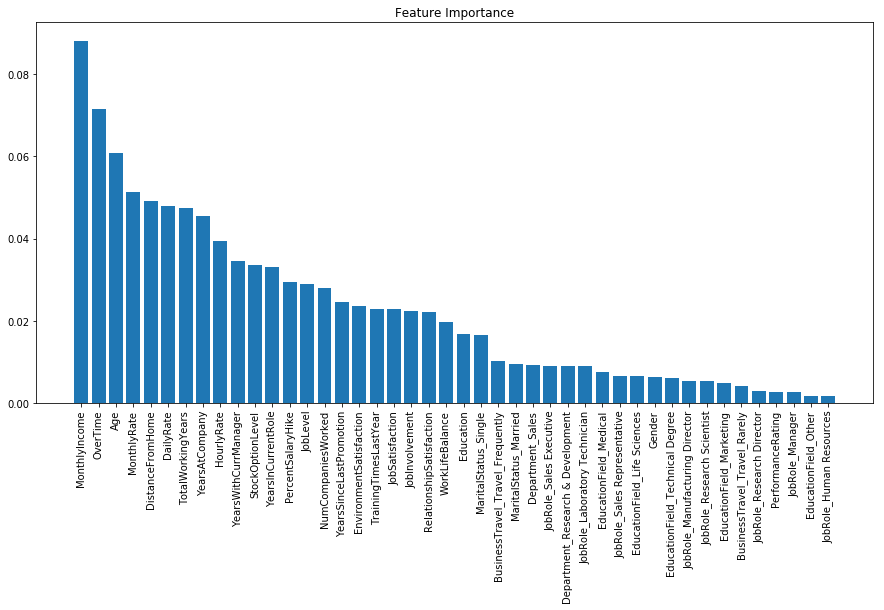

In [46]:
#Show plot
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show()

Random Forest helped us identify the Top 10 most important indicators (ranked in the table below) as:
MonthlyIncome, OverTime, Age, MonthlyRate, DistanceFromHome, DailyRate, TotalWorkingYears, YearsAtCompany, HourlyRate, YearsWithCurrManager.

In [47]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.088179
1,OverTime,0.071542
2,Age,0.060858
3,MonthlyRate,0.051225
4,DistanceFromHome,0.049128
5,DailyRate,0.047802
6,TotalWorkingYears,0.047392
7,YearsAtCompany,0.045513
8,HourlyRate,0.039374
9,YearsWithCurrManager,0.034526


Text(0.5, 257.44, 'Predicted label')

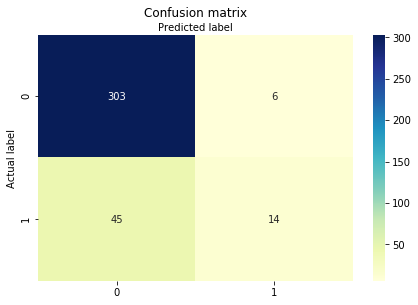

In [48]:
#Evaluation
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The Confusion matrix is telling us that we have 303+14 correct predictions and 1+52 incorrect predictions. In other words, an accurac of 86.14%.

In [49]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       309
         1.0       0.70      0.24      0.35        59

   micro avg       0.86      0.86      0.86       368
   macro avg       0.79      0.61      0.64       368
weighted avg       0.84      0.86      0.83       368



In [50]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.818


## ROC Graphs
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.
The green line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). 

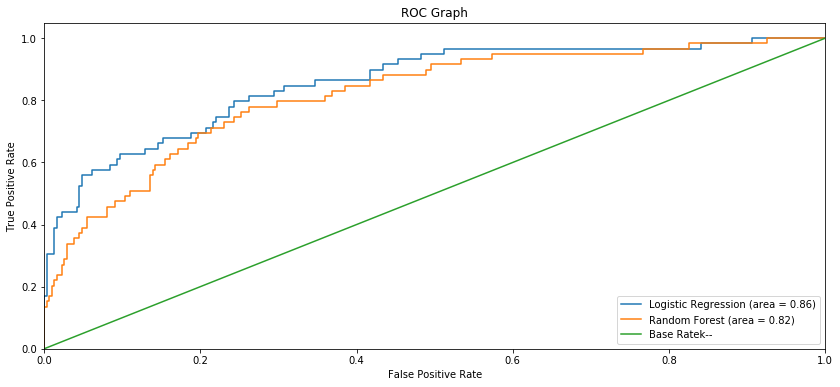

In [51]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

As shown below, the fine-tuned Logistic Regression model showed a higher AUC score compared to the Random Forest Classifier. 

## Concluding Remarks

### Risk Category

As the company generates more data on its employees (on New Joiners and recent Leavers) the algorithm can be re-trained using the additional data and theoritically generate more accurate predictions to identify high-risk employees of leaving based on the probabilistic label assigned to each feature variable (i.e. employee) by the algorithm.

Employees can be assigning a "Risk Category" based on the predicted label such that:

    Low-risk for employees with label < 0.6
    Medium-risk for employees with label between 0.6 and 0.8
    High-risk for employees with label > 0.8 

In [52]:
#ML PIPILINES
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(StandardScaler(),RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=0) )

In [53]:
model = pipeline.fit(X_train, y_train)

In [54]:
predicted = model.predict(X_test)

In [55]:
print(predicted)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [56]:
metrics.classification_report(y_test, predicted)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n         0.0       0.84      1.00      0.91       309\n         1.0       0.00      0.00      0.00        59\n\n   micro avg       0.84      0.84      0.84       368\n   macro avg       0.42      0.50      0.46       368\nweighted avg       0.71      0.84      0.77       368\n'

In [57]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2019-12-09 14:35:20,558 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [58]:
wml_credentials={
  "apikey": "8F5mBIyTuyMhHGcpt_OaraSM87HXIHbQ_gmAUPbXYLi8",
  "iam_apikey_description": "Auto-generated for key 31482908-dc18-49e1-82ac-d3d76d6e8070",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/bfece11d78674a43814800dd663fc3d1::serviceid:ServiceId-1f91e0b4-8a2c-4fb4-9e17-39fbda76b0ca",
  "instance_id": "4bb32fec-39ab-4c30-ae10-fb0db837dd1e",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [59]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [60]:
import json
instance_details = client.service_instance.get_details()
print(json.dumps(instance_details, indent=2))

{
  "metadata": {
    "guid": "4bb32fec-39ab-4c30-ae10-fb0db837dd1e",
    "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4bb32fec-39ab-4c30-ae10-fb0db837dd1e",
    "created_at": "2019-12-09T12:22:32.512Z",
    "modified_at": "2019-12-09T12:22:32.512Z"
  },
  "entity": {
    "source": "Bluemix",
    "published_models": {
      "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4bb32fec-39ab-4c30-ae10-fb0db837dd1e/published_models"
    },
    "usage": {
      "expiration_date": "2020-01-01T00:00:00.000Z",
      "computation_time": {
        "limit": 180000,
        "current": 0
      },
      "gpu_count_k80": {
        "limit": 8,
        "current": 0
      },
      "model_count": {
        "limit": 200,
        "current": 1
      },
      "gpu_count_p100": {
        "limit": 0,
        "current": 0
      },
      "prediction_count": {
        "limit": 5000,
        "current": 1
      },
      "capacity_units": {
        "limit": 180000000,
        "current": 0
      },
   

In [61]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Rachana Vishwanathula", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "rachvis1@in.ibm.com",
               client.repository.ModelMetaNames.NAME: "Churn Prediction"}

In [62]:
published_model = client.repository.store_model(model=model, meta_props=model_props, \
                                                training_data=X_train, training_target=y_train)

In [63]:
published_model_uid = client.repository.get_model_uid(published_model)
model_details = client.repository.get_details(published_model_uid)

print(json.dumps(model_details, indent=2))

{
  "metadata": {
    "guid": "69f04b94-8907-46c9-b076-56bde0eba0ce",
    "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4bb32fec-39ab-4c30-ae10-fb0db837dd1e/published_models/69f04b94-8907-46c9-b076-56bde0eba0ce",
    "created_at": "2019-12-09T14:35:21.557Z",
    "modified_at": "2019-12-09T14:35:21.619Z"
  },
  "entity": {
    "runtime_environment": "python-3.6",
    "learning_configuration_url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4bb32fec-39ab-4c30-ae10-fb0db837dd1e/published_models/69f04b94-8907-46c9-b076-56bde0eba0ce/learning_configuration",
    "author": {
      "name": "Rachana Vishwanathula"
    },
    "name": "Churn Prediction",
    "label_col": "Attrition",
    "learning_iterations_url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4bb32fec-39ab-4c30-ae10-fb0db837dd1e/published_models/69f04b94-8907-46c9-b076-56bde0eba0ce/learning_iterations",
    "training_data_schema": {
      "features": {
        "type": "DataFrame",
        "fields": [
          {

In [64]:
models_details = client.repository.list_models()

------------------------------------  ----------------  ------------------------  -----------------
GUID                                  NAME              CREATED                   FRAMEWORK
69f04b94-8907-46c9-b076-56bde0eba0ce  Churn Prediction  2019-12-09T14:35:21.557Z  scikit-learn-0.20
b02ee941-01a6-40e6-86ef-193ae4ab3ead  Churn Prediction  2019-12-09T12:32:23.632Z  scikit-learn-0.20
------------------------------------  ----------------  ------------------------  -----------------


In [65]:
loaded_model = client.repository.load(published_model_uid)
print(loaded_model)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_im...ators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])


In [66]:
test_predictions = loaded_model.predict(X_test[:10])

In [67]:
print(test_predictions)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [68]:
#Deploying as a webservice
created_deployment = client.deployments.create(published_model_uid, "Deployment of locally created scikit model")



#######################################################################################

Synchronous deployment creation for uid: '69f04b94-8907-46c9-b076-56bde0eba0ce' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0ac8438b-e9ac-49e3-a73b-0e7a5fff83bd'
------------------------------------------------------------------------------------------------




In [69]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

print(scoring_endpoint)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4bb32fec-39ab-4c30-ae10-fb0db837dd1e/deployments/0ac8438b-e9ac-49e3-a73b-0e7a5fff83bd/online


In [70]:
deployments = client.deployments.get_details()

print(json.dumps(deployments, indent=2))

{
  "resources": [
    {
      "metadata": {
        "guid": "0ac8438b-e9ac-49e3-a73b-0e7a5fff83bd",
        "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4bb32fec-39ab-4c30-ae10-fb0db837dd1e/deployments/0ac8438b-e9ac-49e3-a73b-0e7a5fff83bd",
        "created_at": "2019-12-09T14:35:27.152Z",
        "modified_at": "2019-12-09T14:35:27.430Z"
      },
      "entity": {
        "runtime_environment": "python-3.6",
        "name": "Deployment of locally created scikit model",
        "scoring_url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4bb32fec-39ab-4c30-ae10-fb0db837dd1e/deployments/0ac8438b-e9ac-49e3-a73b-0e7a5fff83bd/online",
        "deployable_asset": {
          "name": "Churn Prediction",
          "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4bb32fec-39ab-4c30-ae10-fb0db837dd1e/published_models/69f04b94-8907-46c9-b076-56bde0eba0ce",
          "guid": "69f04b94-8907-46c9-b076-56bde0eba0ce",
          "created_at": "2019-12-09T14:35:27.126Z",
         

In [71]:
deployment_url = client.deployments.get_url(created_deployment)

print(deployment_url)

https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4bb32fec-39ab-4c30-ae10-fb0db837dd1e/deployments/0ac8438b-e9ac-49e3-a73b-0e7a5fff83bd


In [72]:
scoring_payload = {"values": [list(X_test.iloc[1,:])]}

In [73]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)

In [74]:
print(json.dumps(predictions, indent=2))

{
  "fields": [
    "prediction",
    "probability"
  ],
  "values": [
    [
      0.0,
      [
        0.7964087502056626,
        0.20359124979433738
      ]
    ]
  ]
}
